In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from models.kwpwridge import *
from models.linear_tree import *

data = pd.read_csv('data/parkinsons+telemonitoring/parkinsons_updrs.data')

data.head(10)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


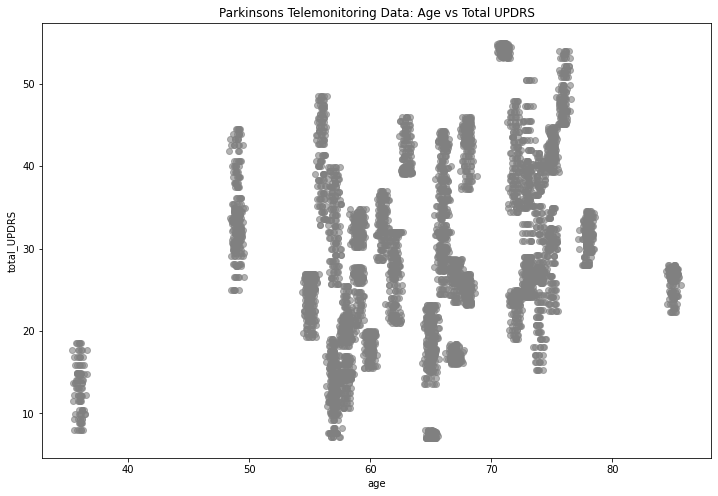

In [2]:
X = data['age'].to_numpy() + np.random.normal(loc=0, scale=0.25, size=len(data))
y = data['total_UPDRS'].to_numpy()

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='grey', label='Data', alpha=0.6)
plt.xlabel('age')
plt.ylabel('total_UPDRS')
plt.title('Parkinsons Telemonitoring Data: Age vs Total UPDRS');

In [3]:
split_points = [52, 63, 71]

model = kwPWRidgeRegressor(0.1)
lhs_lt = LinearTree(max_depth = 2, min_r2_gain = 0.05, alpha = 0.1, lam = 5000, depth_shrink=1)
hs_lt = LinearTree(max_depth = 2, min_r2_gain = 0.05, alpha = 0.1, lam = 5000, depth_shrink= 0)

In [4]:
model.fit(X, y, split_points)
lhs_lt.fit(X.reshape(-1, 1), y)
hs_lt.fit(X.reshape(-1, 1), y)

(5875, 2) (5875, 1)
(5875, 2) (5875, 1)


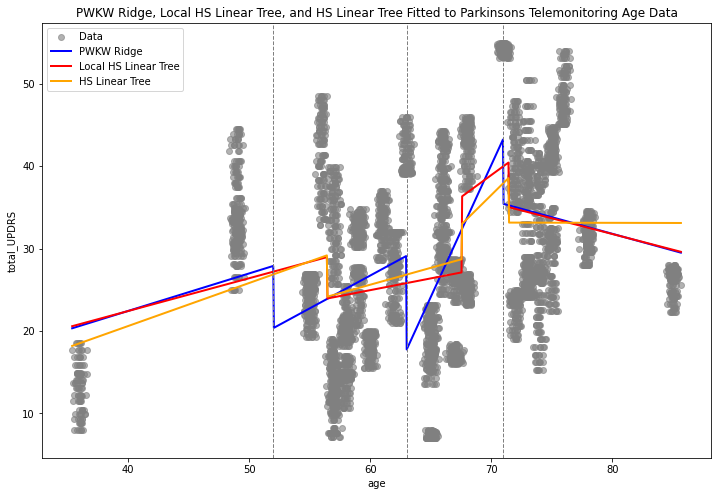

In [5]:
space = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

plt.figure(figsize=(12, 8))

plt.scatter(X, y, color='grey', label='Data', alpha=0.6)

plt.plot(space, model.predict(space.reshape(-1, )), color = 'blue', label='PWKW Ridge', linewidth=2)
plt.plot(space, lhs_lt.predict(space), color = 'red', label='Local HS Linear Tree', linewidth=2)
plt.plot(space, hs_lt.predict(space), color = 'orange', label='HS Linear Tree', linewidth=2)
for split in split_points:
    plt.axvline(x=split, color='grey', linestyle='--', linewidth=1)
plt.xlabel('age')
plt.ylabel('total_UPDRS')
plt.legend()
plt.title('PWKW Ridge, Local HS Linear Tree, and HS Linear Tree Fitted to Parkinsons Telemonitoring Age Data')
plt.savefig('figs/parkinsons.png')
plt.show()

In [6]:
#Some Multi-D Performance Below

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [8]:
chosen_columns = ['age','test_time','motor_UPDRS']

In [9]:
X_md = data[chosen_columns].to_numpy()
y_md = data['total_UPDRS'].to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_md, y_md, test_size=0.33, random_state=42)

In [11]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 3), (1939, 3), (3936, 1), (1939, 1))

In [16]:
lhs_lt = LinearTree(max_depth = 4, min_r2_gain = 0, alpha = 0.1, lam = 5000, depth_shrink=2)
dt = DecisionTreeRegressor(max_depth = 4)
ridge = Ridge(alpha = 0.1)

In [17]:
lhs_lt.fit(X_train, y_train)
dt.fit(X_train, y_train)
ridge.fit(X_train, y_train)

(3936, 4) (3936, 1)


Ridge(alpha=0.1)

In [18]:
mean_squared_error(y_test, lhs_lt.predict(X_test)), mean_squared_error(y_test, dt.predict(X_test)), mean_squared_error(y_test, ridge.predict(X_test))

(6.10717339519635, 8.769677682265694, 11.379965718497033)